In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


## Importing Data

In [62]:
dataset= pd.read_csv("C:/Users/SONU/Desktop/OLX_Car_Data_CSV.csv",delimiter=',',encoding ="ISO-8859-1")
dataset.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [63]:
data=dataset.copy()
dataset.describe(include="all")

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
count,22836,22837,22528,2.268700e+04,22525,2.497300e+04,20337,22528,22689.000000
unique,23,2,5,NaN,303,NaN,61,2,NaN
top,Suzuki,Used,Petrol,NaN,Cultus VXR,NaN,Karachi,Cash,NaN
freq,9773,18472,14309,NaN,1775,NaN,16599,21513,NaN
mean,NaN,NaN,NaN,1.278112e+05,NaN,9.128953e+05,NaN,NaN,2005.901626
std,NaN,NaN,NaN,5.996726e+05,NaN,1.537134e+06,NaN,NaN,9.563804
min,NaN,NaN,NaN,1.000000e+00,NaN,5.000000e+04,NaN,NaN,1915.000000
25%,NaN,NaN,NaN,1.600000e+04,NaN,3.800000e+05,NaN,NaN,2002.000000
50%,NaN,NaN,NaN,6.651000e+04,NaN,6.500000e+05,NaN,NaN,2008.000000
75%,NaN,NaN,NaN,1.000000e+05,NaN,1.145000e+06,NaN,NaN,2013.000000


In [64]:
print(data.isnull().sum())
print(data.shape)


Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64
(24973, 9)


Displaying the values of null in data

In [65]:
data.dropna(subset=['Brand','Condition','Fuel','Model','Registered City','Transaction Type'],how='all',axis=0,inplace=True)
print(data.shape)
print(data.isnull().sum())


(22837, 9)
Brand                  1
Condition              0
Fuel                 309
KMs Driven           150
Model                312
Price                  0
Registered City     2500
Transaction Type     309
Year                 148
dtype: int64


Removed the rows which contain 'Brand','Condition','Fuel','Model','Registered City','Transaction Type' all these coloumns as null

In [148]:
data['KMs Driven'].fillna((data['KMs Driven'].mean()),inplace=True)
data['Year'].fillna((data['Year'].mode()),inplace=True)
data['Brand'].fillna('unkown',inplace=True)
data['Condition'].fillna('unkown',inplace=True)
data['Fuel'].fillna('unkown',inplace=True)
data['Model'].fillna('unkown',inplace=True)
data['Registered City'].fillna('unkown',inplace=True)
data['Transaction Type'].fillna('unkown',inplace=True)

Replacing KNS Driven column NaN values with mean,
Replacing Year column NaN values with mode,
Replacing Catagarical columns  NaN values with unknow



In [7]:
data2=data.dropna(axis=0)
print(data.shape)


(22837, 9)


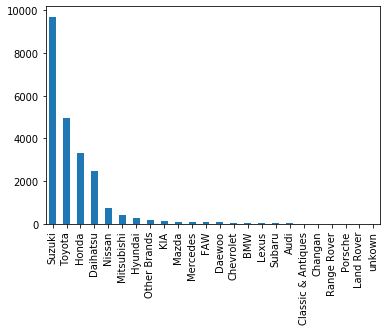

In [8]:
data2['Brand'].value_counts().plot(kind='bar')

Suzuki,Toyata ,Honda car are the Top 3 cars in sell

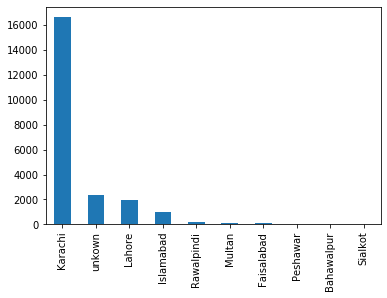

In [9]:
data2['Registered City'].value_counts()[0:10].plot(kind='bar')

#Kaarachi , Lahore,islamabad are the Top 3 registated cities cars in cell

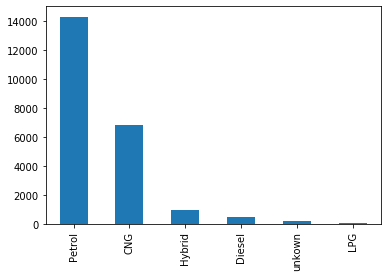

In [10]:
data2['Fuel'].value_counts()[0:10].plot(kind='bar')

#petrol cars are the most numbers of car for sale

## Analysing the Price Attribute

Skewess : 26.042812
Kurtosis : 1101.915080


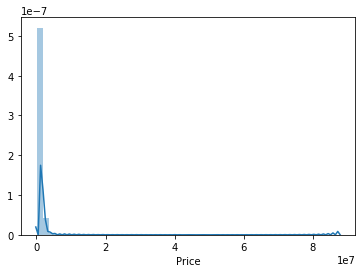

In [11]:
sns.distplot(data2['Price'])
print("Skewess : %f" %  data2['Price'].skew())
print("Kurtosis : %f" %  data2['Price'].kurt())

#we can observe that the distribution of prices shows a high positive skewness to left(skew >1).Kurtosis value is extremly high , meaning that  there is a outliers in dataset

## Relation with Numerical Features


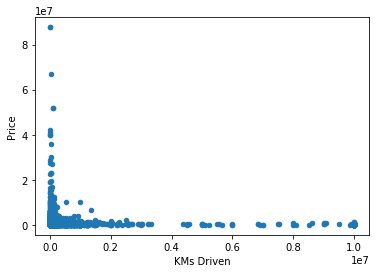

In [12]:
data2.plot.scatter('KMs Driven','Price')

 we see that the lesser is the KMs Driven , the higher tends to the price

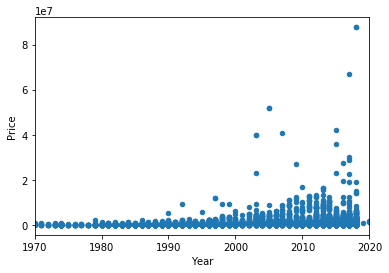

In [13]:
data2.plot.scatter('Year','Price',xlim=(1970,2020))

we see that the new model  cars has the higher tends to the price

## Relation ship with Categoarical Features

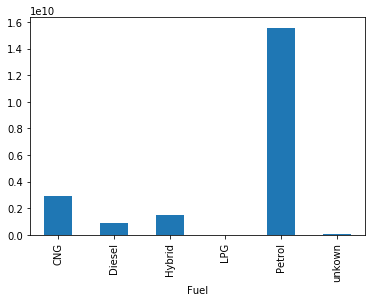

In [14]:
v=data2.groupby('Fuel').Price.sum()
v.plot(kind='bar')


Petrol Cars are more costly than other cars

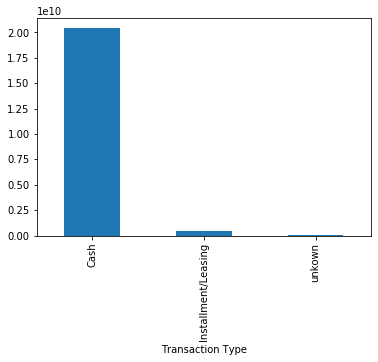

In [15]:
v=data2.groupby('Transaction Type').Price.sum()
v.plot(kind='bar')


#most of paymets are done by cash

## Most Importance Related To Target

In [16]:
print('Find Most Important features relative to target ')
corr=data2.corr()
corr.sort_values(['Price'],ascending=False,inplace=True)
corr.Price

Find Most Important features relative to target 


Price         1.000000
Year          0.251250
KMs Driven   -0.035821
Name: Price, dtype: float64

#between the price and year there is positive correlation,higher is the year, higher the price 

## Correlatin Matrix


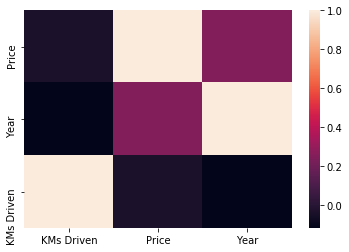

In [17]:
sns.heatmap(corr)

#there is a mild +ve correlation between price and year 

C:\Users\SONU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


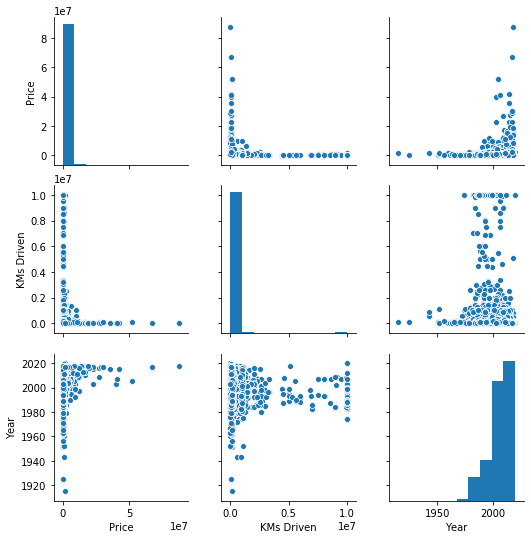

In [18]:
num_features=['Price','KMs Driven','Year']
sns.pairplot(data2[num_features],size=2.5)
plt.show()

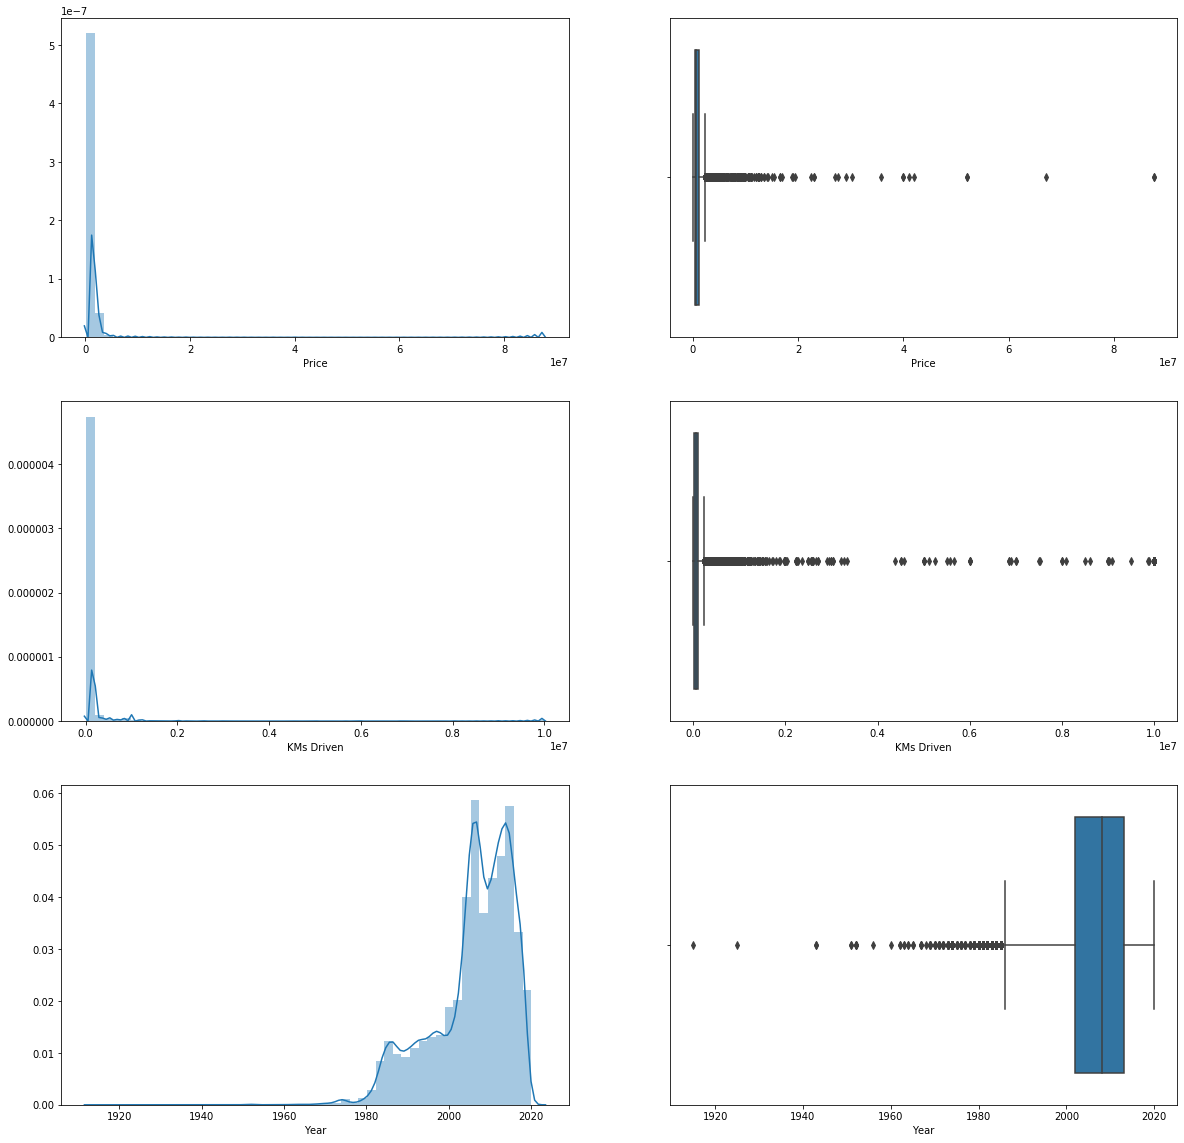

In [19]:
f,axes=plt.subplots(3,2,figsize=(20,20))
sns.distplot(data2['Price'],ax=axes[0,0])
sns.boxplot(data2['Price'],ax=axes[0,1])
sns.distplot(data2['KMs Driven'],ax=axes[1,0])
sns.boxplot(data2['KMs Driven'],ax=axes[1,1])
sns.distplot(data2['Year'],ax=axes[2,0])
sns.boxplot(data2['Year'],ax=axes[2,1])


Checking the outliers and Removed it by InterQuantileRange

In [20]:
def outlier(df,col):
    q1,q3 = df[col].quantile(0.25),df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    outliers=[x for x in df[col] if x < lower_fence or x > upper_fence]
    outliers_removed = df.loc[(df[col]> lower_fence) & (df[col] < upper_fence)]
    return outliers_removed
data3=outlier(data2,'Price')
data3=outlier(data3,'KMs Driven')
data3=outlier(data3,'Year')

Pairplot after removing outliers

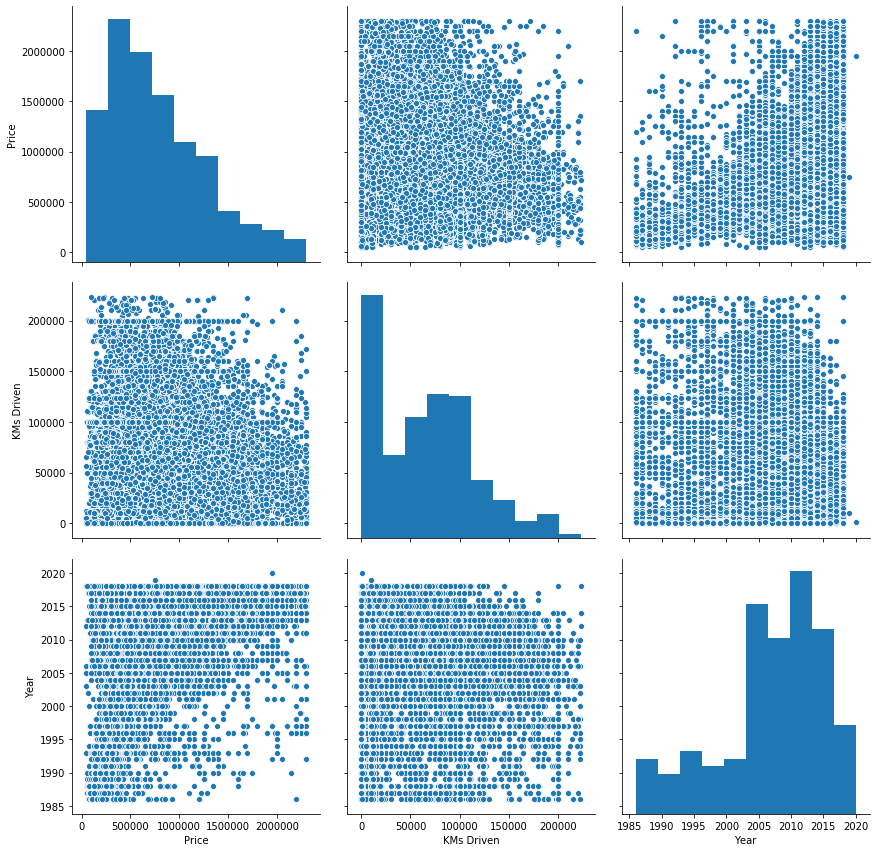

In [21]:
num_features=['Price','KMs Driven','Year']
sns.pairplot(data3[num_features],height=4)
plt.show()

In [22]:
data3.describe()

,KMs Driven,Price,Year
count,19846.000000,1.984600e+04,19846.000000
mean,65083.909620,7.893846e+05,2006.935201
std,51142.033792,4.981315e+05,8.062782
min,1.000000,5.000000e+04,1986.000000
25%,16000.000000,4.000000e+05,2004.000000
50%,65000.000000,6.700000e+05,2008.000000
75%,100000.000000,1.100000e+06,2013.000000
max,223240.000000,2.300000e+06,2020.000000


## multicolliniearity


In [23]:
variables= data3[['KMs Driven','Year']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [24]:
vif

,Vif,features
0,2.615706,KMs Driven
1,2.615706,Year


#the value of vif is between 1 and 5 so, we can consider this in it

## Creating Dummy Variables

In [25]:
data4= pd.get_dummies(data3,drop_first=True)
data4.head()

,KMs Driven,Price,Year,Brand_BMW,Brand_Changan,Brand_Chevrolet,Brand_Classic & Antiques,Brand_Daewoo,Brand_Daihatsu,Brand_FAW,...,Registered City_Sheikhüpura,Registered City_Sialkot,Registered City_Sukkar,Registered City_Sukkur,Registered City_Tank,Registered City_Vehari,Registered City_Wah,Registered City_unkown,Transaction Type_Installment/Leasing,Transaction Type_unkown
0,1.0,2100000,1997.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100000.0,380000,2006.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12345.0,340000,1998.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,94000.0,535000,2010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000.0,1430000,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y=data4['Price'].values
X=data4.drop(['Price'],axis=1)

## Spliting the dataset into test and train

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [149]:
testdf=pd.DataFrame()
testdf['Actual values']=y_test
X_test.to_csv('Testcases.csv')

## LinearRegression

In [30]:

from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(X_train,y_train)

y_pred_train= regressor.predict(X_train)

y_pred_test=regressor.predict(X_test)

In [31]:
print("Train R square",regressor.score(X_train,y_train))


Train R square 0.8276614634108642


In [91]:
print(y_pred_train[0:5])
print(list(y_train[0:5]))

print(y_pred_test[0:5])
print(list(y_test[0:5]))

[ 342476.4440117  1020192.74897251  500290.16937535  972145.41982606
 1779816.86248935]
[275000, 1320000, 475000, 930000, 1550000]
[1242843.81072133 1669393.23062024  355601.71826331  668203.11905691
 1791586.37653489]
[1350000, 1930000, 80000, 735000, 1775000]


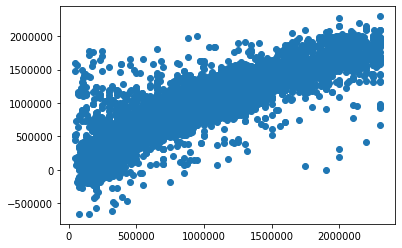

In [33]:
plt.scatter(y_train,y_pred_train)

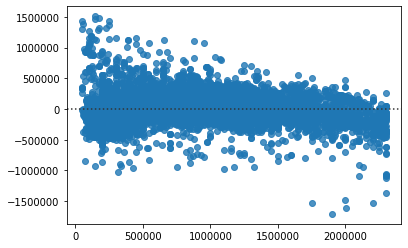

In [34]:
sns.residplot(y_train,y_pred_train)

In [120]:
print("Test R square ",regressor.score(X_test,y_test))
testdf['linear regression predction values']=y_pred_test
testdf['Regression Model Error']=error(y_test,y_pred_test)

Test R square  0.768274407574729


In [131]:


def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    print('RMSE of Training is %.2f' % train_error)
    print('RMSE of Test is %.2f' %  validation_error)

In [132]:
calc_metrics(X_train, y_train, X_test, y_test, regressor)

RMSE of Training is 207887.46
RMSE of Test is 235843.26


In [111]:
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
def error(y_true,y_pred):
    return (((y_true-y_pred)))


In [39]:
mean_absolute_percentage_error(y_test,y_pred_test)

32.179375181355496

# K-flod Cross Validation for Random Regressor

In [40]:
acc_regressor=cross_val_score(regressor,X=X_train,y=y_train,cv=4)
print("Regressor model score by kFlod Cross Validation is %.2f"% acc_regressor.mean())

Regressor model score by kFlod Cross Validation is 0.78


## Random Forest

In [41]:

random= RandomForestRegressor()
param_grid={
    'max_depth':[3,5,9,10,None],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    'n_estimators':[100,200]
    
    
}



In [42]:
gridsearch=GridSearchCV(estimator=random,param_grid=param_grid,n_jobs=-1,cv=3)

gridsearch=gridsearch.fit(X_train,y_train)

print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8776536794385048
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
from sklearn.ensemble import RandomForestRegressor
random_regressor=RandomForestRegressor(min_samples_leaf=gridsearch.best_params_['min_samples_leaf'],
                                      max_depth=gridsearch.best_params_['max_depth'],
                                      min_samples_split=gridsearch.best_params_['min_samples_split'],
                                      n_estimators=gridsearch.best_params_['n_estimators'])

random_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
y_pred_random=random_regressor.predict(X_train)
print("Train R square",random_regressor.score(X_train,y_train))


Train R square 0.9686277878718986


In [67]:
print(y_pred_random[0:10])
print(list(y_train[0:10]))


[ 294320.87301587 1053536.22763348  496099.50505051  897220.32600733
 1618160.81439394  861505.33603571  514142.67857143 1403787.17839105
  872842.90873016 1198321.20039683]
[275000, 1320000, 475000, 930000, 1550000, 2000030, 510000, 1440000, 892000, 1185000]


In [ ]:
y_pred_random_test= random_regressor.predict(X_test)


In [134]:
print("Test R square ",random_regressor.score(X_test,y_test))
calc_metrics(X_train, y_train, X_test, y_test, random_regressor)

Test R square  0.8808733103570332
RMSE of Training is 88975.97
RMSE of Test is 169439.26


In [121]:
print(y_pred_random_test[0:5])
print(list(y_test[0:5]))
testdf['Random Forest model predction values']=y_pred_random_test
testdf['Random Forest Model Error']=error(y_test,y_pred_random_test)

[1327003.86904762 1838146.36904762  109528.502886    732931.72619048
 1646837.24206349]
[1350000, 1930000, 80000, 735000, 1775000]


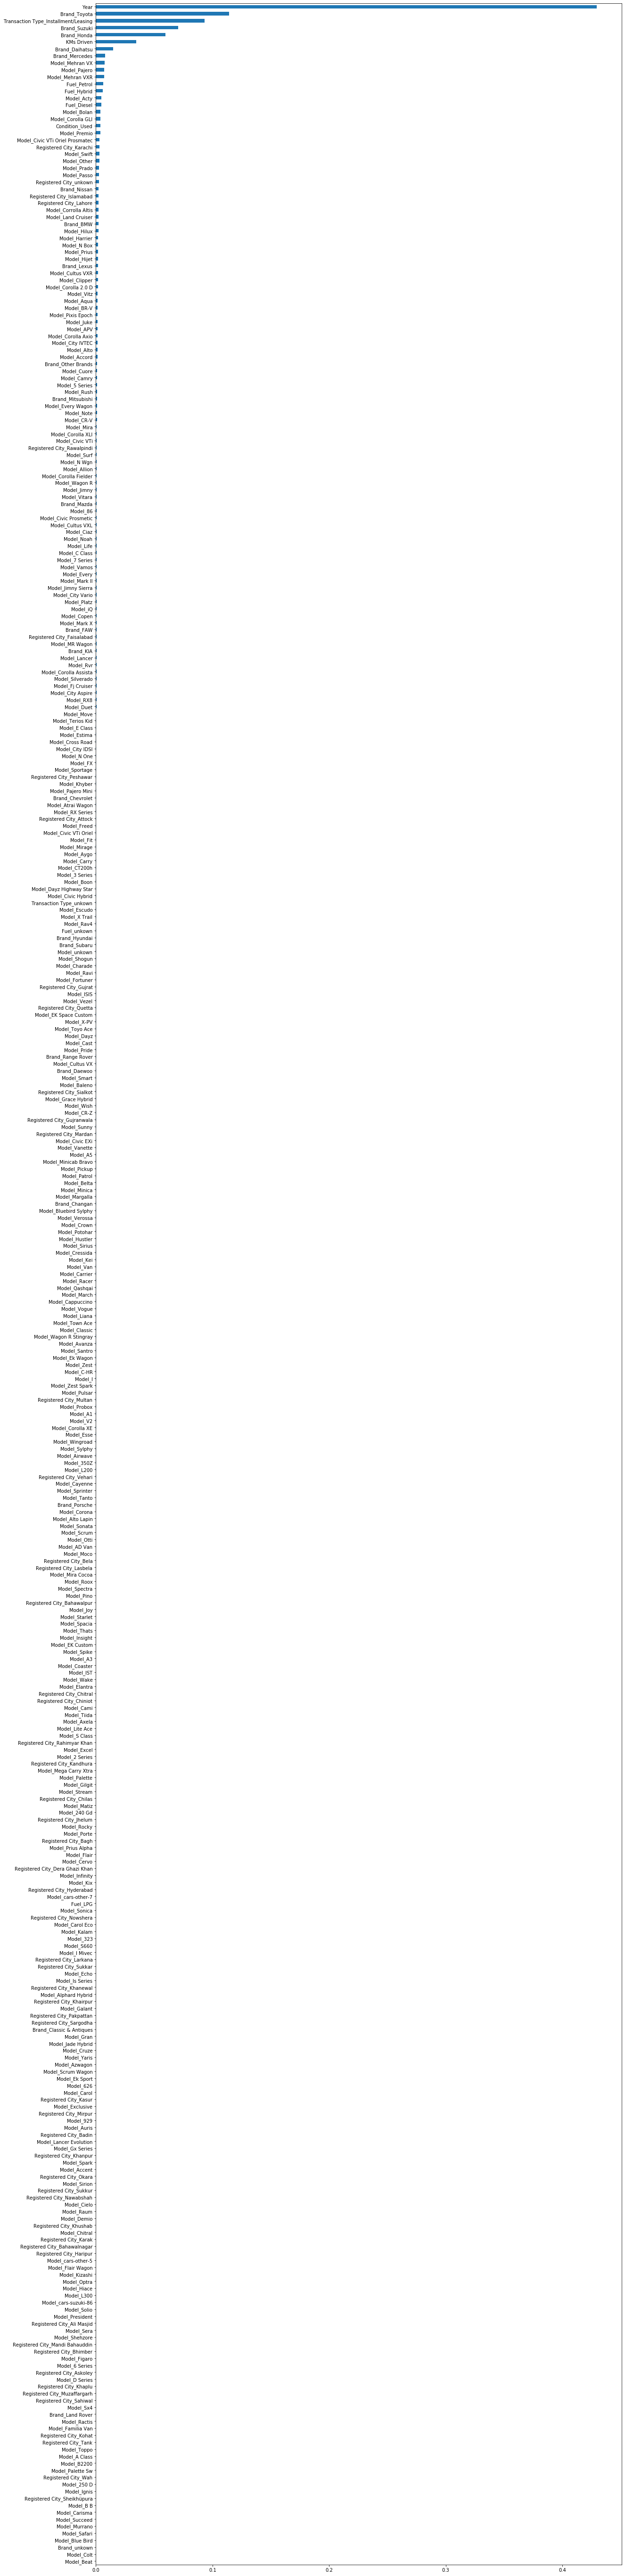

In [69]:
plt.figure(figsize=(20,100))
features_importance_ser=pd.Series(random_regressor.feature_importances_,index=X_train.columns.values)
features_importance_ser.sort_values().plot(kind='barh')

In [70]:
features_importance_ser.sort_values(ascending=False)

Year                                    4.295493e-01
Brand_Toyota                            1.140635e-01
Transaction Type_Installment/Leasing    9.317782e-02
Brand_Suzuki                            7.045777e-02
Brand_Honda                             5.944657e-02
KMs Driven                              3.478506e-02
Brand_Daihatsu                          1.469957e-02
Brand_Mercedes                          7.812343e-03
Model_Mehran VX                         7.350484e-03
Model_Pajero                            7.267447e-03
Model_Mehran VXR                        7.245241e-03
Fuel_Petrol                             6.481074e-03
Fuel_Hybrid                             5.893109e-03
Model_Acty                              4.577072e-03
Fuel_Diesel                             4.551300e-03
Model_Bolan                             4.042014e-03
Model_Corolla GLI                       3.784222e-03
Condition_Used                          3.726443e-03
Model_Premio                            3.7165

In [71]:
features_to_use=features_importance_ser.sort_values(ascending=False).index.values[:10]
features_to_use

array(['Year', 'Brand_Toyota', 'Transaction Type_Installment/Leasing',
       'Brand_Suzuki', 'Brand_Honda', 'KMs Driven', 'Brand_Daihatsu',
       'Brand_Mercedes', 'Model_Mehran VX', 'Model_Pajero'], dtype=object)

In [73]:

mean_absolute_percentage_error(y_test,y_pred_random_test)

18.457395835324608

## K-flod Cross Validation for Random Regressor

In [74]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(random_regressor,X=X_train,y=y_train,cv=4)


In [75]:
print("Random Forest model score by kFlod Cross Validation is %.2f"% acc.mean())

Random Forest model score by kFlod Cross Validation is 0.88


## XGBOOST Regression 

In [80]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [81]:

params={'max_depth':[3,6,9],
        'leaning_rate':[0.1,0.01],
        'n_estimators':[300,500],
        'reg_alpha':[0],
        'reg_lambda':[1],
        'min_child_weight':[6,8,10],
        }
xg=XGBRegressor(objective ='reg:squarederror')
reg_xg=RandomizedSearchCV(estimator=xg,param_distributions=params,n_iter=10,cv=2)

   

In [82]:
reg_xg.fit(X_train,y_train)
y_pred_xg=reg_xg.predict(X_test)
print(reg_xg.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', leaning_rate=0.1, learning_rate=0.1,
             max_delta_step=0, max_depth=6, min_child_weight=6, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)


In [83]:
mean_absolute_percentage_error(y_test,y_pred_xg)

20.19835704288027

In [ ]:
#grid_xgb=GridSearchCV(xg,params,cv=5,verbose=True)
#grid_xgb.fit(X_train,y_train)
#print(grid_xgb.best_score)
#print(grid_xgb.best_params_)

In [143]:
print("Test R square ",reg_xg.score(X_test,y_test))


Test R square  0.8658419155353295


In [145]:
print("Train R square ",reg_xg.score(X_train,y_train))


Train R square  0.9121889847268368


## K-flod Cross Validation for Xgboost Regressor

In [140]:
acc=cross_val_score(reg_xg,X=X_train,y=y_train,cv=4)


In [147]:
print("Xgboost Regressor model score by kFlod Cross Validation is %.2f"% acc.mean())

Xgboost Regressor model score by kFlod Cross Validation is 0.88


In [123]:
testdf['XGboost Regressor predction values']= y_pred_xg
testdf['XGboot Model Error']=error(y_test,y_pred_xg)

In [135]:
testdf.to_csv('Test_outputs.csv')

## Conclusion

For Linear Regression R squrared score is about 76%

4-Fold cross validation is 78 % and Training is score is 82%

For Random Forest R squrared score is about 88%

4-Fold cross validation is 88 % and Training is score is 95%

For XGboost R squrared score is about 86%

4-Fold cross validation is 88 % Training is score is 91%